# TD : Introduction à `sklearn`

## Formation Machine Learning en Python

Romain Tavenard

Creative Commons CC BY-NC-SA


Dans cette séance, nous aborderons l'utilisation de modèles `sklearn`.

Pour disposer de tous les objets / fonctions dont vous aurez besoin, commencez
votre code avec l'en-tête suivante :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs, load_boston, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Génération de données synthétiques & régression linéaire

Dans la suite, vous allez tirer des données aléatoirement. Pour que vos
expériences soient répétables, vous **devez**, avant toute chose, initialiser
la graine de votre générateur aléatoire :

In [2]:
np.random.seed(0)

Notez que, sauf indication contraire, `sklearn` utilise l'état courant du
générateur aléatoire de `numpy`, donc en fixant cette graine, vous rendez
répétable le comportement de `numpy` ainsi que celui de `sklearn` pour la suite
de votre programme.

1. À l'aide du module
[`numpy.random`](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html),
générez une matrice `X` de 100
observations en dimension 1 tirées d'une loi gaussienne centrée réduite.
Générez également un vecteur `y` tel que :

$$\forall i, y_i = \sin(X_i) + \varepsilon_i, \text{ où }  \varepsilon_i \sim N(0, 0.1)$$

In [5]:
X = np.random.randn(100, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

2. Affichez ces données dans une fenêtre `matplotlib`.

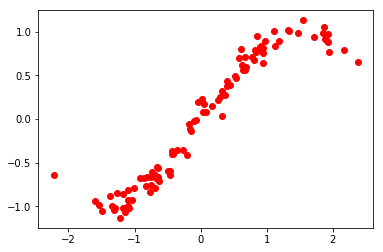

In [6]:
plt.plot(X, y, 'ro');

3. Vous allez maintenant chercher à estimer les paramètres d'un modèle de
régression linéaire (classe [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))
à ces données.
Pour ce faire, les deux premières étapes consisteront à :

a. Créer une instance de la classe `LinearRegression` et
b. Appeler sa méthode `fit()`.

La troisème étape consistera à obtenir les prédictions ($\hat{y_i}$) du modèle
à l'aide de la méthode `predict()`.

4. Quels sont les attributs des instances de la classe `LinearRegression` ?
Quels sont leurs valeurs dans votre cas ?

5. Affichez, dans une fenêtre `matplotlib`, les données en bleu et les valeurs
prédites correspondantes en rouge.

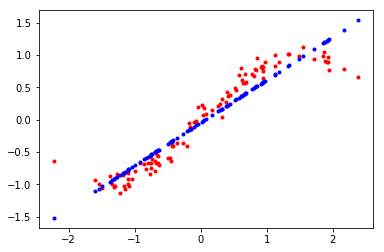

In [7]:
model = LinearRegression()
model.fit(X, y)
y_hat = model.predict(X)

plt.plot(X, y, 'r.', X, y_hat, 'b.');

# Régression Lasso

6. Générez une matrice `X` de 100
observations en dimension 10 tirées d'une loi gaussienne de moyenne nulle et
dont la matrice de variance-covariance est égale à l'identité.
Générez également un vecteur `y` tel que :

$$\forall i, y_i = \sin(X_{i,0}) + \varepsilon_i, \text{ où }  \varepsilon_i \sim N(0, 0.1)$$

Jetez un oeil aux dimensions de `y`. Vous devriez avoir un vecteur colonne
(_ie._ une matrice de dimension `(100, 1)`). Si ce n'est pas le cas, c'est qu'il
faut redimensionner la sortie de la fonction `numpy.sin` à l'aide de la méthode
[`reshape`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [9]:
X = np.random.randn(100, 10)
y = np.sin(X[:, 0]).reshape((100, 1)) + 0.1 * np.random.randn(100, 1)

7. À l'aide de la fonction
[`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
du module `model_selection`, divisez votre jeu de données en un jeu
d'apprentissage et un jeu de test, de tailles égales.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

8. En utilisant uniquement les données d'apprentissage, estimez les paramètres
d'un modèle
[`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
(pour `alpha=0.2`). Affichez les paramètres estimés. Qu'en pensez-vous ?

[ 0.39921954 -0.         -0.         -0.          0.         -0.
 -0.          0.         -0.         -0.        ]


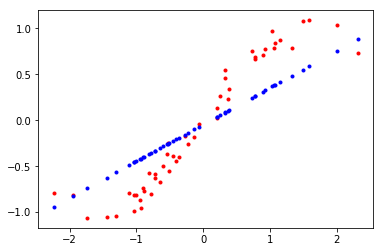

In [11]:
model = Lasso(alpha=0.2)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

plt.figure()
plt.plot(X_test[:, 0], y_test, 'r.')
plt.plot(X_test[:, 0], y_hat, 'b.')
print(model.coef_)

9. Utilisez l'un des deux modèles vus précédemment sur le jeu de données
[_Boston Housing_](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

10. Observez, pour quelques instances, les écarts entre loyer prévu par le modèle et loyer réel.
Affichez l'erreur quadratique moyenne ([_mean squared error_](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) obtenue.

In [12]:
boston = load_boston()
X = boston.data
y = boston.target

X_tr = StandardScaler().fit_transform(X)

model = Lasso(alpha=0.2)
model.fit(X_tr, y)

print(model.sparse_coef_)
print(model.score(X_tr, y))

  (0, 0)	-0.33904468451478736
  (0, 1)	0.3794592348441334
  (0, 2)	-0.024138001993783093
  (0, 3)	0.616933388420814
  (0, 4)	-1.0799737420555147
  (0, 5)	2.9637516229924152
  (0, 7)	-1.73013195749324
  (0, 8)	0.007771850294856346
  (0, 10)	-1.7737234473423218
  (0, 11)	0.6708669978777166
  (0, 12)	-3.7159282072620936
0.7216078266540258


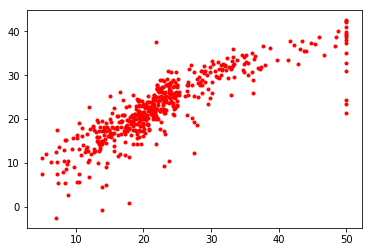

In [13]:
plt.figure()
plt.plot(y, model.predict(X_tr), 'r.');

# Classification : préparation des données

Nous allons maintenant travailler sur un jeu de données ultra classique en
_machine learning_ : le jeu de données "Iris". Ce jeu de données est intégré
dans `sklearn` pour être utilisé facilement.

11. Chargez ce jeu de données à l'aide de la fonction [`load_iris`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) du module
`sklearn.datasets`. Faites en sorte de stocker les prédicteurs dans une matrice
`X` et les classes à prédire dans un vecteur `y`. Quelles sont les dimensions
de `X` ?

In [14]:
iris = load_iris()
X = iris.data
y = iris.target

12. Découpez ce jeu de données en un jeu d'apprentissage et un jeu de test de
mêmes tailles et faites en sorte que chacune de vos variables soient
centrées-réduites.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tr = scaler.transform(X_train)
X_test_tr = scaler.transform(X_test)

# Le modèle `SVC` (_Support Vector Classifier_)

13. Apprenez un modèle SVM linéaire (classe [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) dans `sklearn`) pour votre
problème.

14. Évaluez ses performances sur votre jeu de test à l'aide de la fonction
[`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) du module `sklearn.metrics`.

In [16]:
model = SVC(kernel="linear", C=1.)
model.fit(X_train_tr, y_train)
print(model.score(X_train_tr, y_train))
print(model.score(X_test_tr, y_test))

0.9733333333333334
0.92


15. Faites de même avec un modèle SVM à noyau gaussien. Faites varier la valeur
de l'hyperparamètre lié à ce noyau et observez l'évolution du taux de bonnes
classifications.

In [17]:
for gamma in [0.1, 1.0, 10.]:
    model = SVC(kernel="rbf", C=1., gamma=gamma)
    model.fit(X_train_tr, y_train)
    print(model.score(X_test_tr, y_test))

0.9066666666666666
0.92
0.84


# Réduction de la dimension

Dans la suite, on cherchera à visualiser nos données pour mieux comprendre le
résultat produit par nos algorithmes de machine learning.

16. Pour cela, commencez par les plonger dans un espace en deux dimensions à
l'aide d'une ACP (classe [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) en `sklearn`). Notez que dans ce cas, pour transformer nos données dans l'espace des premiers axes de l'ACP, on n'utilisera pas une méthode `predict()` mais une méthode `transform()`.

On fournit la fonction suivante pour visualiser vos données :

In [22]:
def plot_decision(X, y=None, model=None):
    if model is not None:        
        xx, yy = np.meshgrid(np.arange(X[:, 0].min() - .5, X[:, 0].max() + .5, .01),
                                np.arange(X[:, 1].min() - .5, X[:, 1].max() + .5, .01))
        zz_class = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contourf(xx, yy, zz_class, alpha=.2)
    # Plot data
    if y is None:
        y = "k"
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    # Set figure coordinate limits
    plt.xlim(X[:, 0].min() - .5, X[:, 0].max() + .5)
    plt.ylim(X[:, 1].min() - .5, X[:, 1].max() + .5)

    

17. À l'aide d'un appel à cette fonction (sans passer d'argument `model` pour
le moment), visualisez vos données dans le premier plan de l'ACP : vous
semble-t-il raisonnable de tenter d'effectuer une classification supervisée dans
cet espace ?

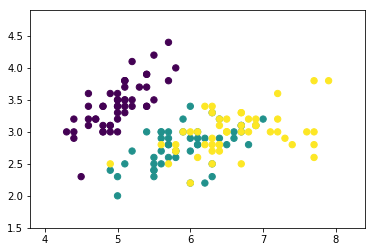

In [23]:
plot_decision(X,y)

# Classification non supervisée

18. Effectuez une classification non supervisée (ce coup-ci, à vous de
    choisir/trouver la bonne classe `sklearn` :) sur vos données représentées
    dans le premier plan de l'ACP. Visualisez le résultat de cette classification
    en passant votre modèle de clustering comme troisième argument de la
    fonction `plot_decision()` définie plus haut.

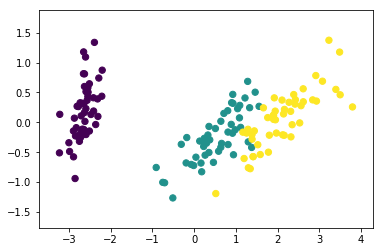

In [24]:
pca = PCA(n_components=2)
pca.fit(X)
X_trans = pca.transform(X)

plot_decision(X_trans, y)

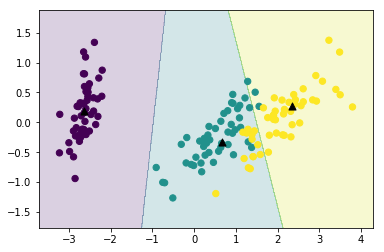

In [25]:
km = KMeans(n_clusters=3)
km.fit(X_trans)

plt.figure()
plot_decision(X_trans, y=y, model=km)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker="^", c="k", s=50)